# **Restaurant Data Analysis**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Importing Dataset**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

##**Task 1: Restaurant Reviews**

Analyze the text reviews to identify the most common positive and negative keywords.

In [ ]:
rating_text = df['Rating text'].dropna()
rating_text.unique()

array(['Excellent', 'Very Good', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

In [ ]:
positive_ratings = ['Excellent', 'Very Good', 'Good']
negative_ratings = ['Average', 'Poor']
df['Sentiment'] = df['Rating text'].apply(lambda x: 'Positive' if x in positive_ratings else ('Negative' if x in negative_ratings else 'Neutral'))


In [ ]:
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts

,count
Sentiment,
Negative,3923
Positive,3480
Neutral,2148


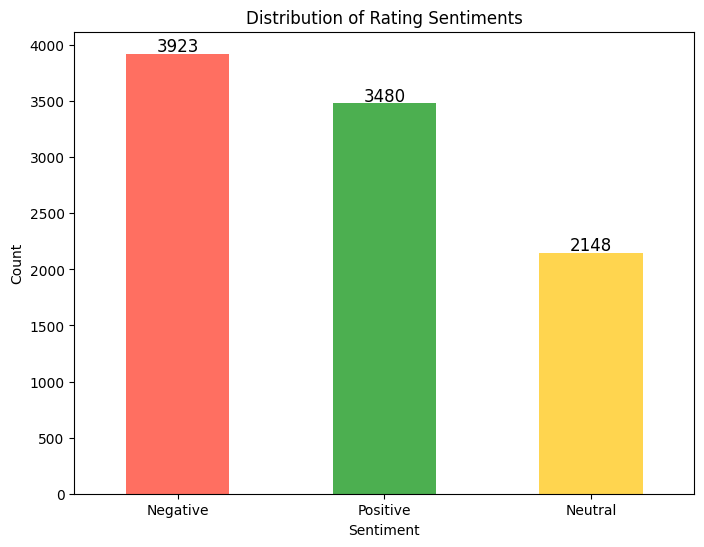

In [ ]:
plt.figure(figsize=(8, 6))
ax=sentiment_counts.plot(kind='bar', color=['#ff6f61', '#4caf50', '#ffd54f'])
plt.title('Distribution of Rating Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
for i in ax.patches:
    ax.annotate(f'{i.get_height()}',
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')
plt.xticks(rotation=0)
plt.show()

Calculate the average length of reviews and explore if there is a relationship between review length and rating.

In [ ]:
df['Rating text length'] = df['Rating text'].apply(len)
average_review_length = df['Rating text length'].mean()
average_review_length

np.float64(7.020730813527379)

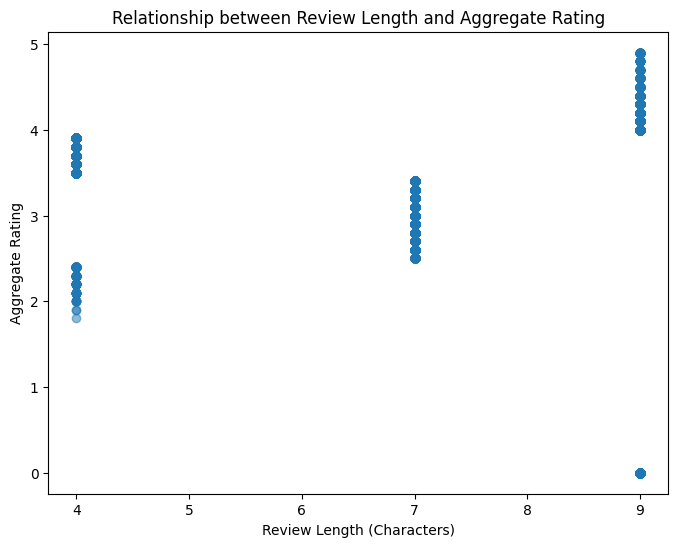

In [ ]:
correlation = df[['Rating text length', 'Aggregate rating']].corr()
plt.figure(figsize=(8, 6))
plt.scatter(df['Rating text length'], df['Aggregate rating'], alpha=0.5)
plt.title('Relationship between Review Length and Aggregate Rating')
plt.xlabel('Review Length (Characters)')
plt.ylabel('Aggregate Rating')
plt.show()


In [ ]:
correlation

,Rating text length,Aggregate rating
Rating text length,1.000000,-0.478885
Aggregate rating,-0.478885,1.000000


The correlation between these two variables is **-0.48**, indicating a moderate negative relationship. This suggests that, on average, shorter reviews tend to be associated with higher aggregate ratings, while longer reviews are more likely to be associated with lower ratings.

##**Task 2: Votes Analysis**

Identify the restaurants with the highest and lowest number of votes.

In [ ]:
max_votes_restaurant= df[df['Votes']==df['Votes'].max()]
max_votes_restaurant

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Sentiment,Rating text length
728,51705,Toit,1,Bangalore,"298, Namma Metro Pillar 62, 100 Feet Road, Ind...",Indiranagar,"Indiranagar, Bangalore",77.640709,12.979166,"Italian, American, Pizza",...,No,No,No,4,4.8,Dark Green,Excellent,10934,Positive,9


In [ ]:
min_votes_restaurant = df[df['Votes']==df['Votes'].min()]
min_votes_restaurant

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Sentiment,Rating text length
69,6710645,Cantinho da Gula,30,S��o Paulo,"Rua Pedroso Alvarenga, 522, Itaim Bibi, S��o P...",Itaim Bibi,"Itaim Bibi, S��o Paulo",-46.675667,-23.581000,Brazilian,...,No,No,No,2,0.0,White,Not rated,0,Neutral,9
874,18433852,The Chaiwalas,1,Faridabad,"Sector 21 A, Asian Hospital, Badhkal Chowk, Ba...",Badkal Lake,"Badkal Lake, Faridabad",77.300088,28.426284,Cafe,...,No,No,No,1,0.0,White,Not rated,0,Neutral,9
879,18465871,Fusion Food Corner,1,Faridabad,"158/7, Opposite DDA Flat, Pul Pehlad Pur, Char...",Charmwood Village,"Charmwood Village, Faridabad",0.000000,0.000000,"North Indian, Chinese",...,No,No,No,1,0.0,White,Not rated,0,Neutral,9
880,18472646,Punjabi Rasoi,1,Faridabad,"1, Deepak Complex, Eros Charmwood Village, Far...",Charmwood Village,"Charmwood Village, Faridabad",77.292431,28.492325,North Indian,...,No,No,No,1,0.0,White,Not rated,0,Neutral,9
887,18471268,Baskin Robbin,1,Faridabad,"Ground Floor, Crown Interiorz Mall, Sector 35,...","Crown Interiorz Mall, Sector 35, Faridabad","Crown Interiorz Mall, Sector 35, Faridabad, Fa...",77.307448,28.469594,Desserts,...,No,No,No,1,0.0,White,Not rated,0,Neutral,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9044,18486858,6 Packs Momos,1,Noida,"Spice World Mall, Sector 25, Noida","Spice World Mall, Sector 25","Spice World Mall, Sector 25, Noida",77.340602,28.586000,Chinese,...,No,No,No,1,0.0,White,Not rated,0,Neutral,9
9098,18431152,Cafe' Wow,1,Noida,"Food Court, 3rd Floor, The Great India Palace ...","The Great India Place, Sector 38","The Great India Place, Sector 38, Noida",77.325600,28.567514,Fast Food,...,No,No,No,1,0.0,White,Not rated,0,Neutral,9
9099,18439721,Chef's Basket Pop Up Caf��,1,Noida,"Inside Big Bazaar, The Great India Place, Sect...","The Great India Place, Sector 38","The Great India Place, Sector 38, Noida",0.000000,0.000000,"Italian, Chinese",...,No,No,No,1,0.0,White,Not rated,0,Neutral,9
9103,18428504,The Hangout-Deli,1,Noida,"320-A, 3rd Floor, The Great India Place Mall, ...","The Great India Place, Sector 38","The Great India Place, Sector 38, Noida",77.323213,28.567751,"Continental, Lebanese, Mexican",...,No,No,No,3,0.0,White,Not rated,0,Neutral,9


Analyze if there is a correlation between the number of votes and the rating of a restaurant.

In [ ]:
correlation =df[["Votes", "Aggregate rating"]].corr()
print(f"Correlation between number of votes and rating of a restaurant:\n {round(correlation, 2)}")

Correlation between number of votes and rating of a restaurant:
                   Votes  Aggregate rating
Votes              1.00              0.31
Aggregate rating   0.31              1.00


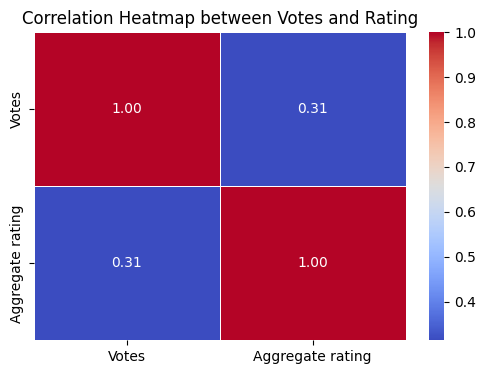

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[["Votes", "Aggregate rating"]].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap between Votes and Rating")
plt.show()

- Here's a correlation heatmap showing the relationship between votes and aggregate ratings. The correlation value (0.31) confirms a weak positive correlation.

##**Task 3: Price Range vs. Online Delivery and Table Booking**

Analyze if there is a relationship between the price range and the availability of online delivery and table booking.

In [ ]:
df["Has Table booking"] = df["Has Table booking"].map({"Yes": 1, "No": 0})
df["Has Online delivery"] = df["Has Online delivery"].map({"Yes": 1, "No": 0})

In [ ]:
corr_matrix = df[["Price range", "Has Table booking", "Has Online delivery"]].corr()
corr_matrix

,Price range,Has Table booking,Has Online delivery
Price range,1.000000,0.501925,0.077918
Has Table booking,0.501925,1.000000,0.101224
Has Online delivery,0.077918,0.101224,1.000000


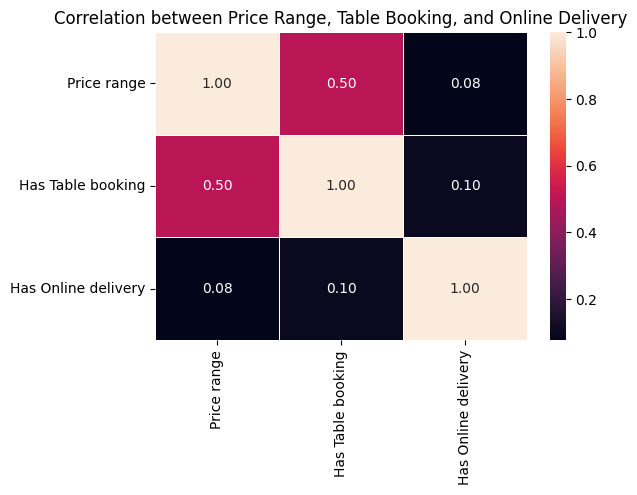

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation between Price Range, Table Booking, and Online Delivery")
plt.show()

- There is a moderate positive correlation (0.50) between price range and table booking availability, meaning higher-priced restaurants are more likely to offer **table bookings**.
- There is a weak positive correlation (0.08) between price range and online delivery availability, suggesting that price range has little influence on whether a restaurant offers **online delivery**.

Determine if higher-priced restaurants are more likely to offer these services

In [ ]:
price_table_booking = df.groupby("Price range")["Has Table booking"].mean()
price_online_delivery = df.groupby("Price range")["Has Online delivery"].mean()


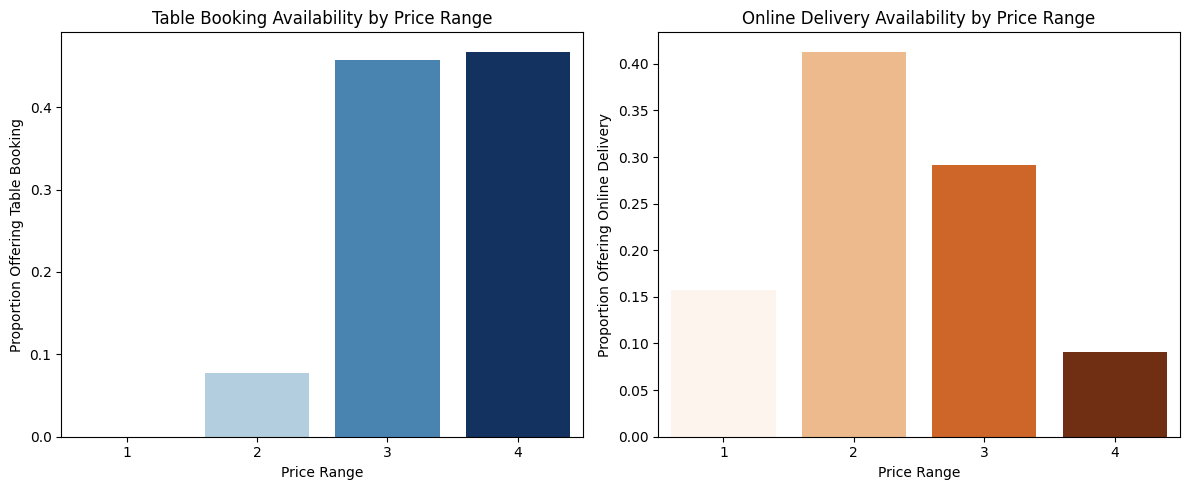

(Price range
 1    0.000225
 2    0.076775
 3    0.457386
 4    0.467577
 Name: Has Table booking, dtype: float64,
 Price range
 1    0.157741
 2    0.413106
 3    0.291903
 4    0.090444
 Name: Has Online delivery, dtype: float64)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=price_table_booking.index, y=price_table_booking.values,hue=price_table_booking.index,legend=False, ax=ax[0], palette="Blues")
ax[0].set_title("Table Booking Availability by Price Range")
ax[0].set_xlabel("Price Range")
ax[0].set_ylabel("Proportion Offering Table Booking")

sns.barplot(x=price_online_delivery.index, y=price_online_delivery.values,hue=price_online_delivery.index,legend=False, ax=ax[1], palette="Oranges")
ax[1].set_title("Online Delivery Availability by Price Range")
ax[1].set_xlabel("Price Range")
ax[1].set_ylabel("Proportion Offering Online Delivery")

plt.tight_layout()
plt.show()

price_table_booking, price_online_delivery



- Higher-priced restaurants (Price Range 3 and 4) are much more likely to
offer **Table bookings**, whereas almost none of the lowest-priced restaurants (Price Range 1) provide this service.
-  Mid-range restaurants (Price Range 2) have the highest **online delivery** availability, while the highest-priced restaurants (Price Range 4) are the least likely.







